In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [17]:
import warnings

warnings.filterwarnings('ignore')

In [18]:
df = pd.read_csv('cont_energy_data.csv')

In [19]:
df.head()

,Date,Consumption (Wh),Day Type,Seasonal Factor,Standard (Electric Ireland),Dynamic (Electric Ireland),ToU (Electric Ireland),Minute Bill Standard EI,Minute Bill Dynamic EI,Minute Bill ToU EI
0,01-01-2021 00:00,13.16,New Year's Day,1.2,0.502,0.471,0.269,6.6063,6.1984,3.5400
1,01-01-2021 00:01,13.04,New Year's Day,1.2,0.502,0.474,0.519,6.5461,6.1810,6.7678
2,01-01-2021 00:02,14.47,New Year's Day,1.2,0.502,0.503,0.362,7.2639,7.2784,5.2381
3,01-01-2021 00:03,14.51,New Year's Day,1.2,0.502,0.551,0.319,7.2840,7.9950,4.6287
4,01-01-2021 00:04,13.48,New Year's Day,1.2,0.502,0.474,0.355,6.7670,6.3895,4.7854


In [20]:
df.describe()

,Consumption (Wh),Seasonal Factor,Standard (Electric Ireland),Dynamic (Electric Ireland),ToU (Electric Ireland),Minute Bill Standard EI,Minute Bill Dynamic EI,Minute Bill ToU EI
count,525600.000000,525600.000000,5.256000e+05,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000
mean,15.640188,1.000000,5.020000e-01,0.417231,0.416664,7.851374,6.527080,6.516000
std,5.418610,0.141421,4.440896e-16,0.144262,0.096176,2.720142,3.293597,2.760620
min,5.760000,0.800000,5.020000e-01,0.167000,0.250000,2.891500,0.967700,1.485100
25%,11.450000,0.859000,5.020000e-01,0.292000,0.333000,5.747900,3.977300,4.409600
50%,15.480000,1.000000,5.020000e-01,0.417000,0.417000,7.771000,5.893600,6.114050
75%,19.170000,1.141000,5.020000e-01,0.542000,0.500000,9.623300,8.553600,8.219325
max,41.060000,1.200000,5.020000e-01,0.667000,0.583000,20.612100,25.901600,23.611700


In [21]:
df.shape

(525600, 10)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 10 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Date                         525600 non-null  object 
 1   Consumption (Wh)             525600 non-null  float64
 2   Day Type                     525600 non-null  object 
 3   Seasonal Factor              525600 non-null  float64
 4   Standard (Electric Ireland)  525600 non-null  float64
 5   Dynamic (Electric Ireland)   525600 non-null  float64
 6   ToU (Electric Ireland)       525600 non-null  float64
 7   Minute Bill Standard EI      525600 non-null  float64
 8   Minute Bill Dynamic EI       525600 non-null  float64
 9   Minute Bill ToU EI           525600 non-null  float64
dtypes: float64(8), object(2)
memory usage: 40.1+ MB


Steps for the data analytics :: EDA ::

1. Check for the null and duplicate values ( if yes either impude them or delte the columns if the vlaues are numm for more than 30% of the data)
2. If the vlaues are not null and duplicates then proceed
3. Data type converison :  In this case the Data column would be divided for the year month and date
4. Univariate Analysis : for each categorical  column : Date Type in this case and for each numerical coluum. 
5. Bivariate analysis : for each numerical to numerical column and for categorical to numerical column. 
6. Make use of the group by function and is possible make a pivot table for the datset for the date type : and year basis : chcek the total consumption and plot it in the graph
7. Check for the outliers in the dataset
8. Get the results and check for the linearity in between the variables ( or columns in this case )
9. If there is a relation then make use of the linear regression or random forest to make the model.


In [23]:
df.isnull().sum()

Date                           0
Consumption (Wh)               0
Day Type                       0
Seasonal Factor                0
Standard (Electric Ireland)    0
Dynamic (Electric Ireland)     0
ToU (Electric Ireland)         0
Minute Bill Standard EI        0
Minute Bill Dynamic EI         0
Minute Bill ToU EI             0
dtype: int64

In [24]:
df.duplicated().sum()

np.int64(0)

In [25]:
df.head()

,Date,Consumption (Wh),Day Type,Seasonal Factor,Standard (Electric Ireland),Dynamic (Electric Ireland),ToU (Electric Ireland),Minute Bill Standard EI,Minute Bill Dynamic EI,Minute Bill ToU EI
0,01-01-2021 00:00,13.16,New Year's Day,1.2,0.502,0.471,0.269,6.6063,6.1984,3.5400
1,01-01-2021 00:01,13.04,New Year's Day,1.2,0.502,0.474,0.519,6.5461,6.1810,6.7678
2,01-01-2021 00:02,14.47,New Year's Day,1.2,0.502,0.503,0.362,7.2639,7.2784,5.2381
3,01-01-2021 00:03,14.51,New Year's Day,1.2,0.502,0.551,0.319,7.2840,7.9950,4.6287
4,01-01-2021 00:04,13.48,New Year's Day,1.2,0.502,0.474,0.355,6.7670,6.3895,4.7854


In [26]:
df.isnull().sum()

Date                           0
Consumption (Wh)               0
Day Type                       0
Seasonal Factor                0
Standard (Electric Ireland)    0
Dynamic (Electric Ireland)     0
ToU (Electric Ireland)         0
Minute Bill Standard EI        0
Minute Bill Dynamic EI         0
Minute Bill ToU EI             0
dtype: int64

univariate and bivariate analysis can be done now on the dataset. The dataset is cleaned 

In [27]:
current_column_name  = df.columns
print(current_column_name)

Index(['Date', 'Consumption (Wh)', 'Day Type', 'Seasonal Factor',
       'Standard (Electric Ireland)', 'Dynamic (Electric Ireland)',
       'ToU (Electric Ireland)', 'Minute Bill Standard EI',
       'Minute Bill Dynamic EI', 'Minute Bill ToU EI'],
      dtype='object')


Now the dataset is cleaned and defined we can start the analysis of the dataframe. 
We would be doing the Univariate and Bivariate Analysis for the dataset.

In [ ]:
# Lets make the count plot for all the columns :  and check the graph for each column : 

def count_plot_function(variable_name , dataframe , xlabel , ylabel):
    plt.figure(figsize=(10 , 6))
    sns.countplot(x = variable_name , data = dataframe )
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

Text(0, 0.5, 'Total Count')

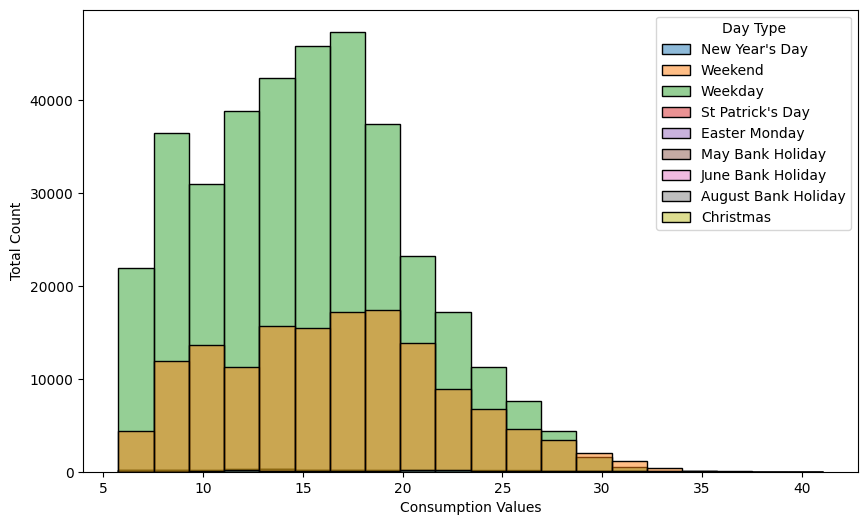

In [39]:
plt.figure(figsize=(10 , 6))
sns.histplot(data = df  , x = "Consumption (Wh)" , bins=20 , hue='Day Type')
plt.xlabel("Consumption Values")
plt.ylabel("Total Count")


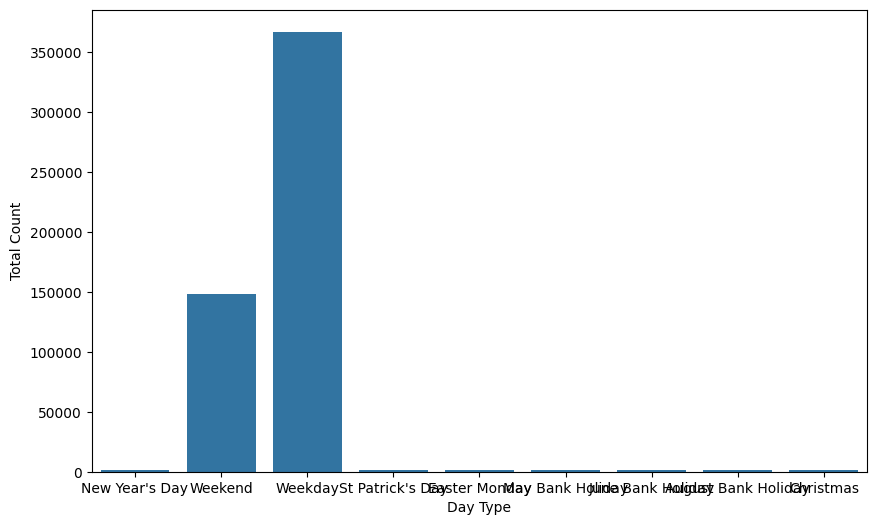

In [ ]:
# Lets check the data for day type and make a count plot for the same : 
count_plot_function("Day Type" , df , "Day Type" , "Total Count")

<Axes: xlabel='Seasonal Factor', ylabel='Consumption (Wh)'>

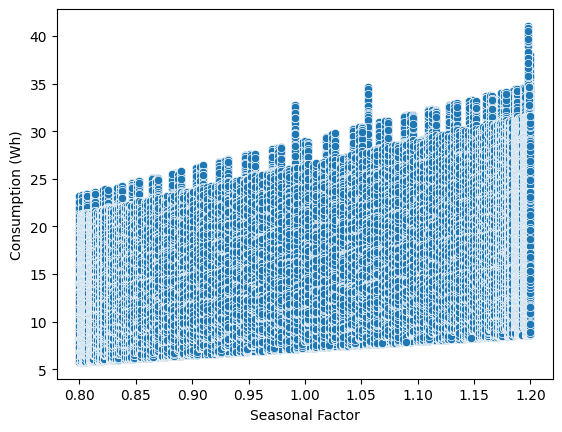

In [43]:
# there is not much to explore in the column wise data lets do the bivariate analysis : 

sns.scatterplot(x = df['Seasonal Factor'] , y=df['Consumption (Wh)'])


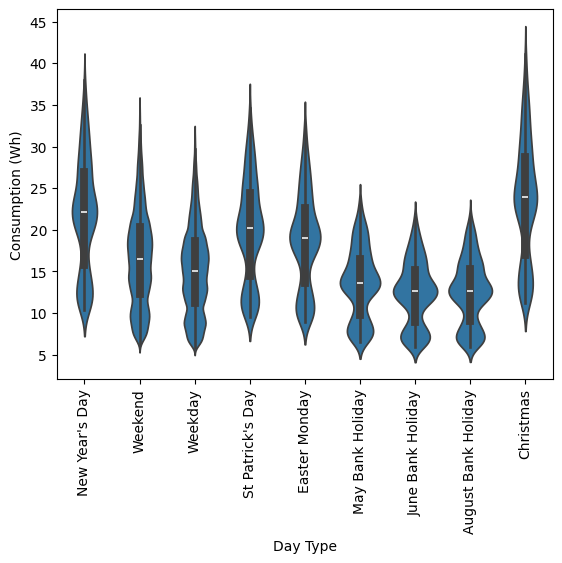

In [44]:
# Lets make a multi type violin plot for the data frame : for the whole data frame : 

sns.violinplot(x='Day Type',y='Consumption (Wh)' , data=df)
plt.xticks(rotation = 90)

plt.show()

In [45]:
# Lets makea another column and divide the date month and year in different columns  :
df['Month'] = pd.DatetimeIndex(df['Date']).month
df['Day'] = pd.DatetimeIndex(df['Date']).day
df['year']  = pd.DatetimeIndex(df['Date']).year

<Axes: >

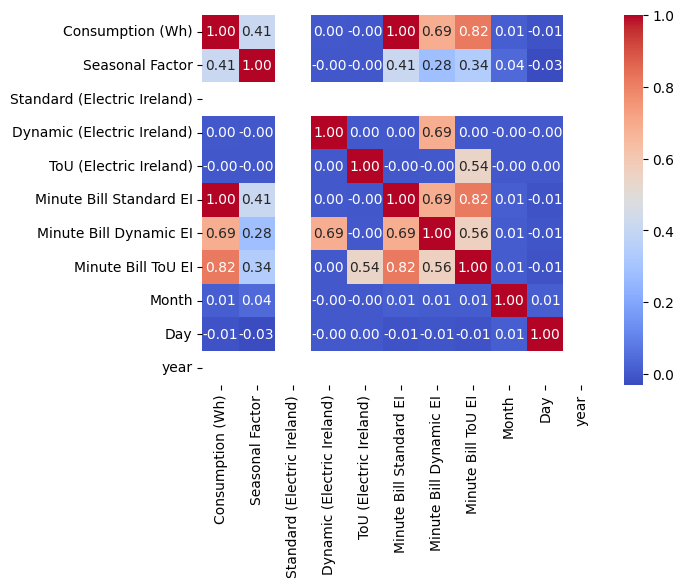

In [46]:
# Lets check the dataset and make Correlation Matrix of the dataaset : 
correlation_df  = df.drop(columns=['Date' , 'Day Type'])
sns.heatmap(correlation_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")

#### From Here we are trying to make a machine learning model :

In [147]:
from sklearn.preprocessing import LabelEncoder
from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score, classification_report



In [148]:

ml_df = df.drop(columns=['Date' , 'year'])


In [149]:
le  = LabelEncoder()
ml_df['Day Type'] = le.fit_transform(ml_df['Day Type'])
ml_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 11 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Consumption (Wh)             525600 non-null  float64
 1   Day Type                     525600 non-null  int64  
 2   Seasonal Factor              525600 non-null  float64
 3   Standard (Electric Ireland)  525600 non-null  float64
 4   Dynamic (Electric Ireland)   525600 non-null  float64
 5   ToU (Electric Ireland)       525600 non-null  float64
 6   Minute Bill Standard EI      525600 non-null  float64
 7   Minute Bill Dynamic EI       525600 non-null  float64
 8   Minute Bill ToU EI           525600 non-null  float64
 9   Month                        525600 non-null  int32  
 10  Day                          525600 non-null  int32  
dtypes: float64(8), int32(2), int64(1)
memory usage: 40.1 MB


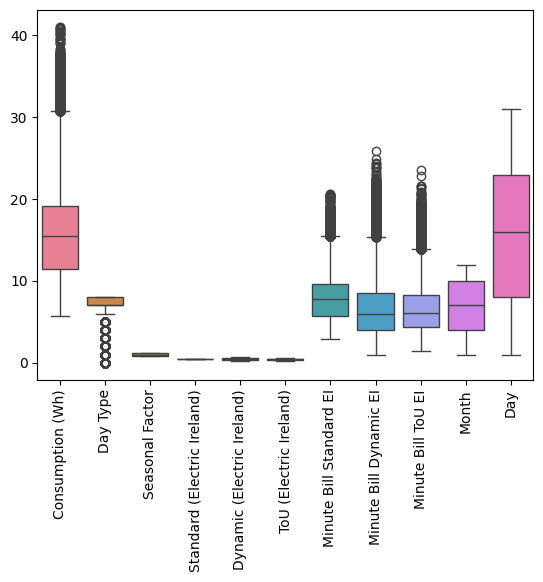

In [150]:
# Before that lets check the boxplot for the outliers : 
sns.boxplot(data=ml_df)
plt.xticks(rotation = 90)

plt.show()

In [151]:
# As we can see each datatype has some outliers and we can remove them using the : scipy library and the z score method : 
z_scores = stats.zscore(ml_df)
threshold = 2
df_no_outliers_2 = df[(z_scores < threshold).all(axis=1)]

In [152]:
df_no_outliers_2 = pd.DataFrame(df_no_outliers_2)

In [153]:
df_no_outliers_2.shape
df_no_outliers_2 = df_no_outliers_2.drop(columns=['year'])

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Consumption (Wh)'),
  Text(1, 0, 'Seasonal Factor'),
  Text(2, 0, 'Standard (Electric Ireland)'),
  Text(3, 0, 'Dynamic (Electric Ireland)'),
  Text(4, 0, 'ToU (Electric Ireland)'),
  Text(5, 0, 'Minute Bill Standard EI'),
  Text(6, 0, 'Minute Bill Dynamic EI'),
  Text(7, 0, 'Minute Bill ToU EI'),
  Text(8, 0, 'Month'),
  Text(9, 0, 'Day')])

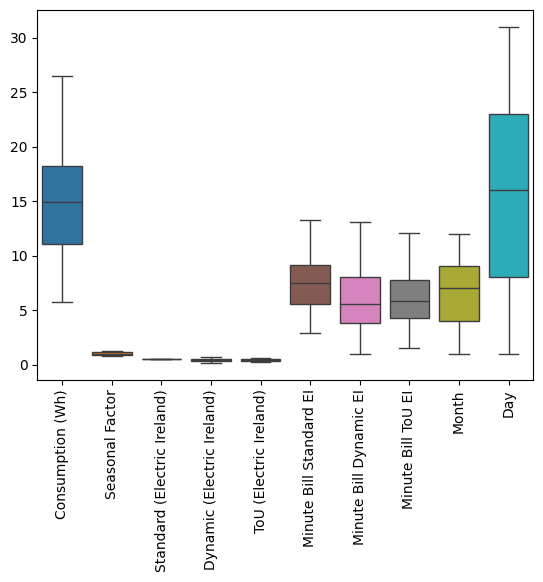

In [154]:
# Lets check for the outliers again  :
sns.boxplot(data=df_no_outliers_2)
plt.xticks(rotation = 90)

In [155]:
# As we can see there are no outliers in the dataset now and we can proceed to make the model : 

df_no_outliers_2.head()

,Date,Consumption (Wh),Day Type,Seasonal Factor,Standard (Electric Ireland),Dynamic (Electric Ireland),ToU (Electric Ireland),Minute Bill Standard EI,Minute Bill Dynamic EI,Minute Bill ToU EI,Month,Day
0,01-01-2021 00:00,13.16,New Year's Day,1.2,0.502,0.471,0.269,6.6063,6.1984,3.5400,1,1
1,01-01-2021 00:01,13.04,New Year's Day,1.2,0.502,0.474,0.519,6.5461,6.1810,6.7678,1,1
2,01-01-2021 00:02,14.47,New Year's Day,1.2,0.502,0.503,0.362,7.2639,7.2784,5.2381,1,1
3,01-01-2021 00:03,14.51,New Year's Day,1.2,0.502,0.551,0.319,7.2840,7.9950,4.6287,1,1
4,01-01-2021 00:04,13.48,New Year's Day,1.2,0.502,0.474,0.355,6.7670,6.3895,4.7854,1,1


In [156]:
# Lets do pca for the dataset : 

df_numeric = df_no_outliers_2.select_dtypes(include=[np.number])
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

In [157]:
pca = PCA(n_components=5) 
pca_result = pca.fit_transform(df_scaled)

In [158]:
pca_df = pd.DataFrame(data=pca_result, columns=[f'PC{i+1}' for i in range(pca.n_components_)])
print(pca_df.head())

        PC1       PC2       PC3       PC4       PC5
0 -0.590843  0.919668 -1.735076 -1.832067 -1.400454
1  0.252238 -0.058189  0.899469 -1.681207 -1.565552
2  0.308379  0.800339 -0.727582 -1.794750 -1.439991
3  0.294788  1.363809 -1.093509 -1.809101 -1.423769
4 -0.162068  0.597677 -0.833642 -1.786729 -1.449791


In [159]:
explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance)

Explained Variance Ratio: [0.37312682 0.16694511 0.14033243 0.11178949 0.11131592]


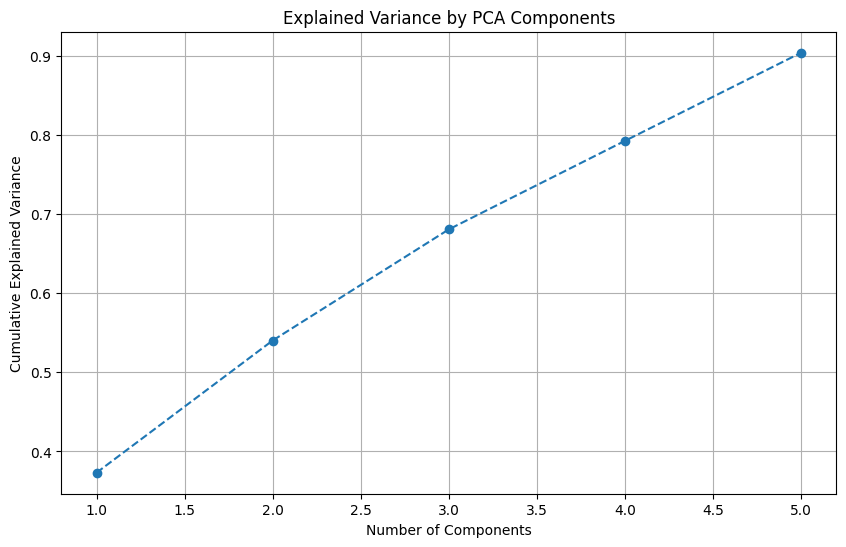

In [160]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), np.cumsum(explained_variance), marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by PCA Components')
plt.grid()
plt.show()

In [161]:
# Creating Linear Regression Model for the current dataset : 
X_lr = df_no_outliers_2[['Seasonal Factor', 'Month', 'Day', 'Day Type']]
X_lr = pd.get_dummies(X_lr, drop_first=True)
y_lr = df_no_outliers_2['Consumption (Wh)']

In [162]:
X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(X_lr, y_lr, test_size=0.2, random_state=42)

In [163]:
lr_model = LinearRegression()
lr_model.fit(X_train_lr, y_train_lr)

LinearRegression()

In [164]:
# Evaluating the model  :

y_pred_lr = lr_model.predict(X_test_lr)
mae = mean_absolute_error(y_test_lr, y_pred_lr)
mse = mean_squared_error(y_test_lr, y_pred_lr)
rmse = np.sqrt(mse)

In [165]:
print(f'Linear Regression - MAE: {mae}')
print(f'Linear Regression - MSE: {mse}')
print(f'Linear Regression - RMSE: {rmse}')

Linear Regression - MAE: 3.560248969753879
Linear Regression - MSE: 18.912138023736702
Linear Regression - RMSE: 4.348808805148451


In [166]:
r2 = r2_score(y_test_lr, y_pred_lr)